In [999]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from urllib.request import urlopen
import json

In [1000]:
# pd.options.display.float_format = '{:.5f}'.format
pd.options.display.float_format = '{:,.2f}'.format
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

## Ⅰ. 2023년 현재 기준 대학 진학 인구 및 대학 분석

### 1. 지역별로 현재 대학 진학이 가능한 연령(20세)을 확인하자. 

In [1001]:
df_age_18 = pd.read_csv('./data/age_18_by_city.csv', index_col=0, encoding='cp949')
# df_age_18 # 2023년01월_계_연령구간인구수 = 18세

In [1002]:
# 그래프1) 지역별 18세 막대그래프

In [1003]:
# 그래프2) 지역별 18세 지도 버블차트

### 2. 전국 대학의 분포를 확인하자.

In [1004]:
df_univ = pd.read_csv('./data/university_list_2022.csv', index_col=0, encoding='UTF8')
# df_univ

In [1005]:
# 그래프3) 전국 대학교의 위치정보(위도, 경도)를 지도에 점으로 표시

In [1006]:
# 그래프4) 시도 별 대학 개수 막대그래프

In [1007]:
# 그래프5) 전국 대학교의 위치정보(위도, 경도) + 지역별 18세 지도 버블차트

## Ⅱ. 신생아 수 추이 및 향후 예상 대학 충원율 분석

### 1. 전국의 신생아 수 추이 및 예상 신행아 수를 확인하자.

In [1008]:
# 전국의 신생아 수

In [1009]:
df_newborn = pd.read_csv('./data/maternity_data.csv', index_col=0, encoding='cp949')
# df_newborn #출생아수(명)

In [1010]:
df_newborn_future = pd.read_csv('./data/newborn_future.csv', index_col=0, encoding='cp949')
# df_newborn_future # 통계청 예측 연도별 출생아수(천명)

In [1011]:
# 그래프5) 전국 1980년~2070년 신생아 수 꺾은선 그래프

In [1012]:
# 그래프6) 지역별 1980년~2070년 신생아 수 꺾은선 그래프

In [1013]:
df_newborn_future_city = pd.read_csv('./data/newborn_by_city.csv', index_col=0, encoding='cp949')
# df_newborn_future_city

In [1014]:
# 2022~2070년 지역별 신생아수 예측값은 임의의 방법으로 총 출생아수 데이터에서 분할

### 2. 대학 정원 대비 대학 진학 가능 인구

In [1015]:
# 표7) 지역별 2022년 대학 정원 및 총 정원 pandas dataframe 표

In [1016]:
df_enroll = pd.read_csv('./data/university_enrollment_2023.csv', index_col=0, encoding='cp949')
# df_enroll[['학교종류','학교','입학정원(A)', '모집인원계']]

In [1017]:
# 그래프8) 2022년 대학 정원 대비 신생아가 대학 진학 연령(20세)가 되었을 경우 예상 대학 충원율 (막대or꺾은선그래프)
# ref. 예측신생아수 / 2022년 대학총정원으로 계산 하였음

------

> 목차 Ⅰ,Ⅱ에서 출생아 수와 대학 정원을 분석한 결과로 미루어보아,<br>
> <b>2023년 현재의 대학 정원 대비 <u>대학 진학 가능 인구는 지속적으로 감소</u></b>할 것이고,
> 그에 따라 <b><u>대학 수의 감소는 불가피</u></b>할 것이다.<br><br>
하기의 목차 Ⅲ,Ⅳ에서 여러 지표를 통해 한국 대학의 경쟁력을 비교하여 보고<br>
현재의 신생아가 대학 진학 연령이 되는 <span style="color:#B22222"><b>2040년을 기준으로 운영 위기에 처할 하위 대학 40%를 분석</b><span>해보자.

## Ⅲ. 2023년 현재 기준 전국 대학 분석

### 1. 전국 신입생 충원율

- 데이터 load

In [1018]:
df_enroll = pd.read_csv('./data/university_enrollment_2023.csv', index_col=0, encoding='cp949')
df_enroll

,학교종류,설립구분,지역,상태,학교,입학정원(A),모집인원계,정원내(B),정원외,지원자계,정원내(C),정원외.1,입학자계,정원내(D)남,정원내(D)여,정원외남,정원외여,정원내 신입생 충원율(%) (D/B) × 100,경쟁률(C/B)
기준연도,,,,,,,,,,,,,,,,,,,
2022,대학교,사립,경남,기존,가야대학교(김해),460,490,463,27,"2,286","2,142",144,383,179,178,6,20,77.10,4.60
2022,대학교,사립,경기,기존,가천대학교,"4,081","4,694","4,083",611,"66,469","62,951","3,518","4,675","2,124","1,959",312,280,100.00,15.40
2022,대학교,사립,강원,기존,가톨릭관동대학교,"1,824","1,957","1,825",132,"7,556","6,926",630,"1,563",858,598,41,66,79.80,3.80
2022,대학교,사립,충북,기존,가톨릭꽃동네대학교,108,115,108,7,535,513,22,108,41,62,2,3,95.40,4.80
2022,대학교,사립,경기,기존,가톨릭대학교,"1,574","1,792","1,576",216,"21,304","20,077","1,227","1,770",697,876,79,118,99.80,12.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,산업대학,사립,전북,기존,호원대학교,"1,132","1,474","1,095",379,"11,878","11,125",753,"1,376",487,539,148,202,93.70,10.20
2022,대학교,사립,서울,기존,홍익대학교,"2,421","2,879","2,422",457,"41,971","39,180","2,791","2,876","1,314","1,105",167,290,99.90,16.20
2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,"1,299","1,412","1,302",110,"10,593","10,189",404,"1,383",644,653,44,42,99.60,7.80


In [1019]:
# 그래프9) 지역별 충원율 평균

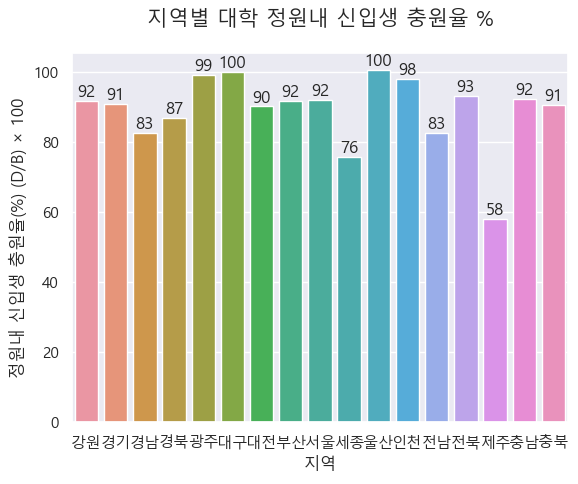

In [1020]:
freshman_rate = df_enroll.groupby('지역')['정원내 신입생 충원율(%) (D/B) × 100'].mean(numeric_only=True).to_frame()
ax_freshman_rate = sns.barplot(data=freshman_rate, x=freshman_rate.index, y='정원내 신입생 충원율(%) (D/B) × 100')
ax_freshman_rate.set_title("지역별 대학 정원내 신입생 충원율 %", fontsize=15, y=1.05)
for i in ax_freshman_rate.containers:
    ax_freshman_rate.bar_label(i, labels=[f'{x.get_height():.0f}' for x in ax_freshman_rate.containers[0]])


- 지역/산업상의 특징이 있는 울산, 대구, 광주의 신입생 충원율 평균이 99~100%로 가장 높다.
- 서울 및 수도권, 부산, 충청등 인구가 많은 주요 도시의 신입생 충원율은 80~90%대이다.
- 제주도의 신입생 충원율은 58%로 가장 낮다.

ref. 상기의 신입생 충원율은 정원내 인원을 기준으로 정원 외 추가로 합격생을 선발한 경우 100% 이상으로 계산되었음 (원본 파일 참고)

In [1021]:
# 그래프10) 지역별 충원율 도수분포표

In [1022]:
# df_enroll[df_enroll['학교']=='삼육대학교']

- 데이터 편집 (각 row에 권역 표기 추가)

In [1023]:
# 권역별 (수도권, 강원권, 충청권, 경상권, 전라권, 제주권) 데이터 분리
df_capital = df_enroll[df_enroll.지역.isin(['서울','경기','인천'])] # 99
df_kangwon = df_enroll[df_enroll.지역.isin(['강원'])] #12
df_chugncheong = df_enroll[df_enroll.지역.isin(['대전','세종','충남','충북'])] #47
df_gyeongsang = df_enroll[df_enroll.지역.isin(['경남','경북','대구','부산','울산'])] #51
df_jeolla = df_enroll[df_enroll.지역.isin(['광주','전남','전북'])] #33
df_jeju = df_enroll[df_enroll.지역.isin(['제주'])] #33
print(len(df_enroll) == len(df_capital)+len(df_kangwon)+len(df_chugncheong)+len(df_gyeongsang)+len(df_jeolla)+len(df_jeju)) # 누락 없이 전체 분할 ok

# 권역 표기
df_capital.insert(2,'권역','수도권')
df_kangwon.insert(2,'권역','강원권')
df_chugncheong.insert(2,'권역','충청권')
df_gyeongsang.insert(2,'권역','경상권')
df_jeolla.insert(2,'권역','전라권')
df_jeju.insert(2,'권역','제주권')

# 권역이 표기된 데이터 concat
df_area_added = pd.concat([df_capital, df_kangwon, df_chugncheong, df_gyeongsang, df_jeolla, df_jeju])
df_area_added[['권역','지역','학교','정원내 신입생 충원율(%) (D/B) × 100']]

True


,권역,지역,학교,정원내 신입생 충원율(%) (D/B) × 100
기준연도,,,,
2022,수도권,경기,가천대학교,100.00
2022,수도권,경기,가톨릭대학교,99.80
2022,수도권,서울,가톨릭대학교 _제2캠퍼스,100.00
2022,수도권,서울,가톨릭대학교 _제3캠퍼스,98.00
2022,수도권,서울,감리교신학대학교,44.20
...,...,...,...,...
2022,전라권,광주,호남대학교,95.40
2022,전라권,광주,호남신학대학교,100.00
2022,전라권,전북,호원대학교,93.70


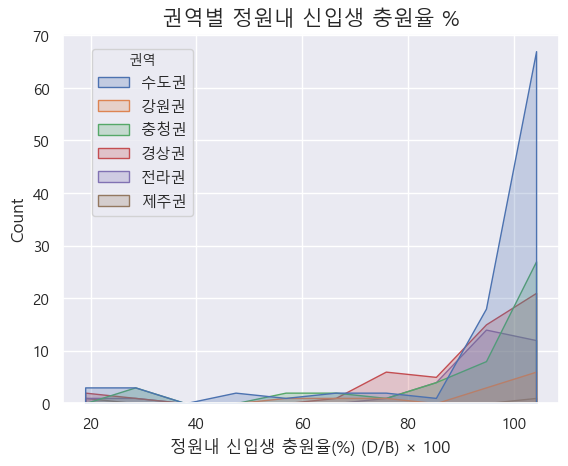

In [1024]:
s_area = df_area_added[['권역','지역','학교','정원내 신입생 충원율(%) (D/B) × 100']]
n_area_ax = sns.histplot(data=s_area, x='정원내 신입생 충원율(%) (D/B) × 100', hue='권역', bins=10, element='poly')
n_area_ax.set_title('권역별 정원내 신입생 충원율 %',fontsize=15, y=1)
sns.move_legend(n_area_ax, "upper center", bbox_to_anchor=(0.161, 0.98), ncol=1, title_fontsize=10)

- 수도권에는 신입생 정원을 모두 충원하는 대학이 70여 곳이 있다.
- 경상권은 정원을 모두 충원하는 대학도 있지만 정원의 70~80%정도를 충원하는 대학이 10여 곳이 있다.

[Text(0.5, 1.0, '제주권')]

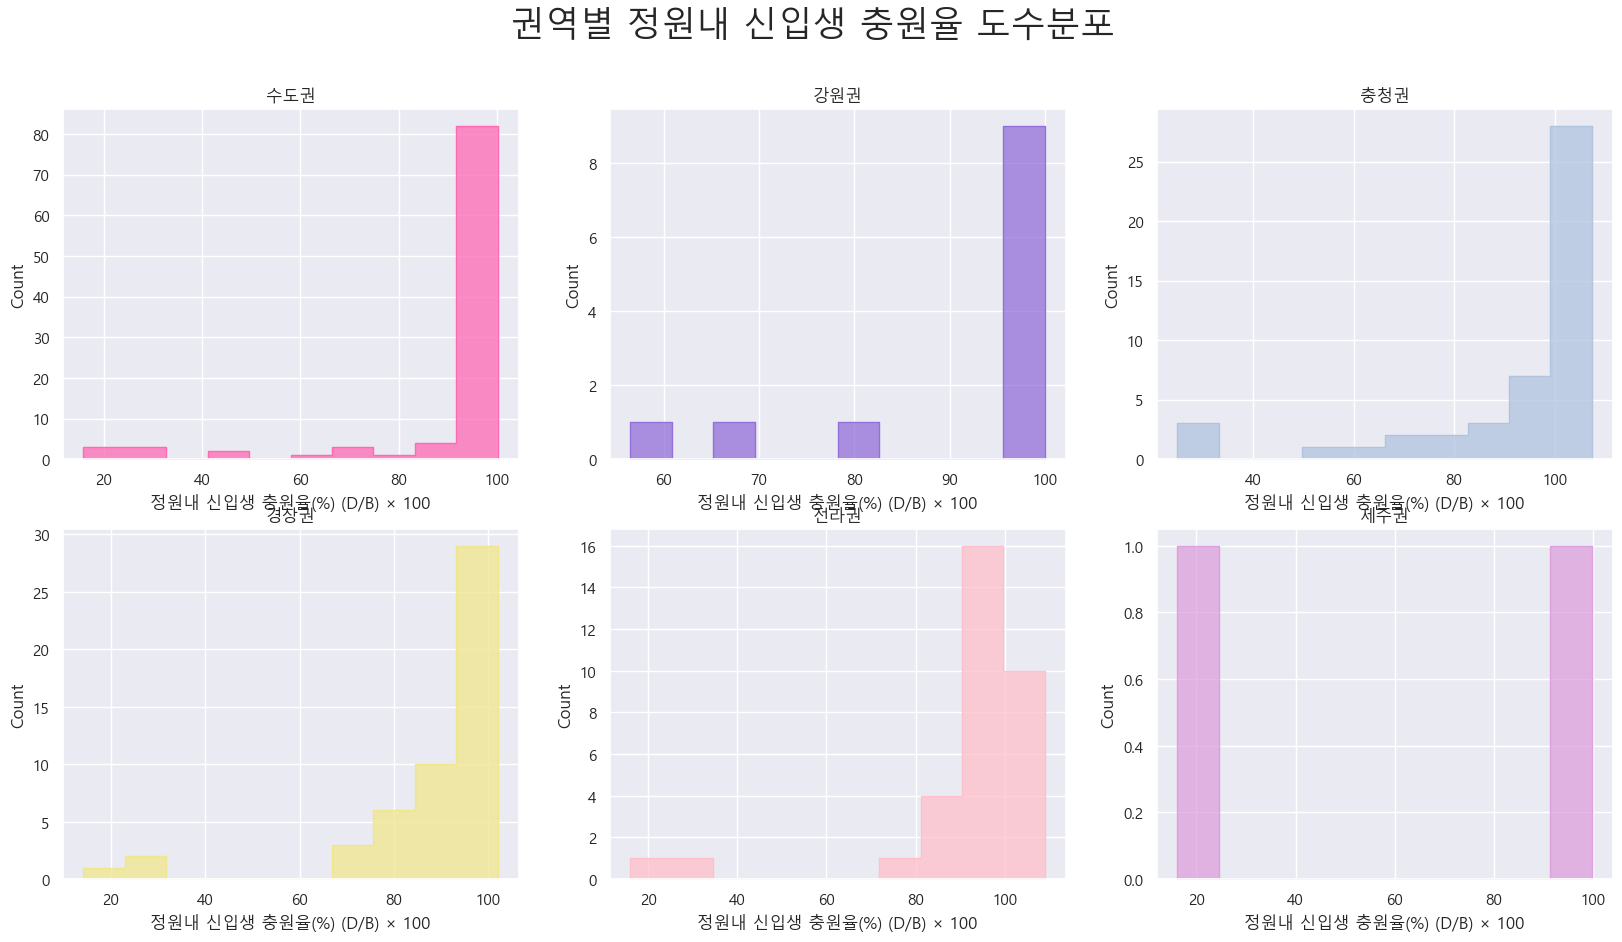

In [1025]:
col_n = 3
row_n = 2
fr_fig, fr_ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))
    
e_capital = df_capital[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
e_kangwon = df_kangwon[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
e_chugncheong = df_chugncheong[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
e_gyeongsang = df_gyeongsang[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
e_jeolla = df_jeolla[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)
e_jeju = df_jeju[['정원내 신입생 충원율(%) (D/B) × 100']].reset_index(drop=True)

# ax_c = sns.histplot(data=e_capital,x=e_capital['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count',ax=ax[0,0])
qualitative_colors = sns.color_palette("Set2", 10)

fr_fig.suptitle('권역별 정원내 신입생 충원율 도수분포', fontsize=25)
sns.histplot(data=e_capital,x=e_capital['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count',ax=fr_ax[0,0], color='hotpink').set(title="수도권")
sns.histplot(data=e_kangwon,x=e_kangwon['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count',ax=fr_ax[0,1], color='mediumpurple').set(title="강원권")
sns.histplot(data=e_chugncheong,x=e_chugncheong['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count', ax=fr_ax[0,2], color='lightsteelblue').set(title="충청권")
sns.histplot(data=e_gyeongsang,x=e_gyeongsang['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count', ax=fr_ax[1,0], color='khaki').set(title="경상권")
sns.histplot(data=e_jeolla,x=e_jeolla['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count', ax=fr_ax[1,1], color='pink').set(title="전라권")
sns.histplot(data=e_jeju,x=e_jeju['정원내 신입생 충원율(%) (D/B) × 100'], bins=10, element='step', stat='count', ax=fr_ax[1,2], color='plum').set(title="제주권")

- 수도권 대학은 대부분 신입생 정원을 충원하지만 적은 수로 충원하지 못하는 곳들이 있다.
- 제주도의 대학은 총 2곳으로 이 중 한 곳은 정원을 충원하고, 한 곳은 약 20%정도밖에 충원하지 못하였다.

### 2. 장학금 현황

- data load

In [1026]:
df_scholarship = pd.read_csv('./data/university_scholarship_2022.csv', index_col=0, encoding='cp949')
#into to float
df_scholarship = df_scholarship.astype({
                '교외장학금 소계(원)':'float',
                 '교외장학금 국가':'float',
                 '교외장학금 지방자치단체':'float',
                 '교외장학금 사설및기타':'float',
                 '교내장학금 소계(원)':'float',
                 '교내장학금 성적우수장학금':'float',
                 '교내장학금 저소득층장학금':'float',
                 '교내장학금 근로장학금':'float',
                 '교내장학금 재난장학금':'float',
                 '교내장학금 교직원장학금':'float',
                 '교내장학금 기타장학금':'float',
                 '총계(원)':'float'
               })
df_scholarship = df_scholarship.replace(np.nan, 0)
# print(df_scholarship.dtypes)
df_scholarship

,설립별,지역별,교외장학금 소계(원),교외장학금 국가,교외장학금 지방자치단체,교외장학금 사설및기타,교내장학금 소계(원),교내장학금 성적우수장학금,교내장학금 저소득층장학금,교내장학금 근로장학금,교내장학금 재난장학금,교내장학금 교직원장학금,교내장학금 기타장학금,총계(원)
학교명,,,,,,,,,,,,,,
ICT폴리텍대학,사립,경기,"368,872,500.00","219,407,500.00",0.00,"149,465,000.00","82,715,000.00","28,500,000.00","48,492,500.00",0.00,0.00,0.00,"5,722,500.00","451,587,500.00"
가야대학교(김해),사립,경남,"4,995,635,065.00","4,957,301,385.00","7,315,680.00","31,018,000.00","2,285,214,810.00","674,255,020.00","915,679,450.00","129,785,340.00",0.00,"35,822,000.00","529,673,000.00","7,280,849,875.00"
가천대학교,사립,경기,"35,109,669,872.00","34,484,846,547.00","101,976,165.00","522,847,160.00","28,256,078,762.00","6,294,783,100.00","8,068,027,560.00","1,480,963,771.00","10,139,300.00","176,458,600.00","12,225,706,431.00","63,365,748,634.00"
가톨릭관동대학교,사립,강원,"16,159,991,032.00","15,525,791,002.00","478,532,550.00","155,667,480.00","6,660,115,923.00","2,922,916,230.00","906,426,550.00","210,252,628.00","115,200,000.00","156,439,000.00","2,348,881,515.00","22,820,106,955.00"
가톨릭꽃동네대학교,사립,충북,"1,468,923,590.00","1,382,093,430.00","1,352,160.00","85,478,000.00","605,438,779.00","80,527,500.00","229,202,000.00","122,970,012.00",0.00,"6,618,000.00","166,121,267.00","2,074,362,369.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
호산대학교,사립,경북,"5,107,035,203.00","5,094,396,643.00","4,938,560.00","7,700,000.00","1,930,323,602.00","238,839,340.00","4,064,760.00","22,629,312.00","334,580.00","9,237,920.00","1,655,217,690.00","7,037,358,805.00"
호서대학교,사립,충남,"25,062,148,720.00","24,078,287,690.00","613,109,030.00","370,752,000.00","16,088,791,360.00","4,655,425,100.00","4,008,123,640.00","1,507,796,110.00",0.00,"126,488,000.00","5,790,958,510.00","41,150,940,080.00"
호원대학교,사립,전북,"14,773,426,820.00","14,643,067,510.00","77,136,810.00","53,222,500.00","7,202,190,410.00","1,387,375,600.00","91,608,200.00","197,757,260.00","2,347,250.00","104,038,000.00","5,419,064,100.00","21,975,617,230.00"


In [1065]:
# df_scholarship.loc['한국폴리텍 V 대학 순천캠퍼스']['교내장학금 소계(원)']

In [1066]:
# df_scholarship.columns.tolist()

In [1029]:
# 표10) 대학 별 장학금 수혜 분석 : 총 장학금이 높은 대학 순위 TOP20

In [1030]:
df_s = df_scholarship.sort_values(by=["총계(원)", "교외장학금 소계(원)", "교내장학금 소계(원)"], 
                                  ascending=[False, False, False])[["설립별", "지역별","교외장학금 소계(원)", "교내장학금 소계(원)", "총계(원)"]]
sch_top = df_s.iloc[:20,:]
sch_top

,설립별,지역별,교외장학금 소계(원),교내장학금 소계(원),총계(원)
학교명,,,,,
계명대학교,사립,대구,"49,988,740,070.00","28,425,091,852.00","78,413,831,922.00"
경희대학교,사립,서울,"42,903,138,434.00","33,926,447,384.00","76,829,585,818.00"
영남대학교,사립,경북,"48,541,464,727.00","24,967,389,316.00","73,508,854,043.00"
중앙대학교,사립,서울,"40,084,866,559.00","32,420,761,424.00","72,505,627,983.00"
단국대학교,사립,경기,"43,548,656,801.00","27,452,334,291.00","71,000,991,092.00"
홍익대학교,사립,서울,"30,316,105,747.00","38,420,665,679.00","68,736,771,426.00"
고려대학교,사립,서울,"34,928,868,941.00","30,265,546,873.00","65,194,415,814.00"
연세대학교,사립,서울,"31,928,969,543.00","33,017,416,779.00","64,946,386,322.00"
가천대학교,사립,경기,"35,109,669,872.00","28,256,078,762.00","63,365,748,634.00"


In [1068]:
sch_top.value_counts('지역별')

지역별
서울    8
부산    3
경기    2
경북    2
대구    2
강원    1
광주    1
인천    1
dtype: int64

- 총장학금 지급 순위 top 20의 대학 분포는 서울이 8곳으로 가장 많고, 부산이3곳, 경기가 2곳 순으로 나타난다.

In [1032]:
# 그래프11) 지역별 장학금 수혜 분석

In [1069]:
# tmp = df_s.groupby(['지역별'])['총계(원)'].mean().to_frame()
df_s.groupby('지역별')['총계(원)'].describe()

,count,mean,std,min,25%,50%,75%,max
지역별,,,,,,,,
강원,21.00,"11,362,508,371.29","13,354,421,059.32","143,835,500.00","1,823,128,417.00","4,043,045,710.00","21,183,037,056.00","52,379,539,594.00"
경기,66.00,"15,553,134,639.83","13,809,666,910.40",0.00,"8,309,337,668.75","13,260,565,653.50","21,514,380,539.75","71,000,991,092.00"
경남,23.00,"10,504,879,037.00","10,603,389,697.64","687,726,327.00","2,947,207,367.50","6,870,394,120.00","14,932,463,832.00","34,604,699,037.00"
경북,38.00,"13,009,822,018.50","16,141,926,980.75","60,281,160.00","3,107,038,864.25","7,167,726,481.50","15,256,172,339.00","73,508,854,043.00"
광주,18.00,"14,564,059,445.22","16,730,488,651.12","1,194,995,834.00","2,598,699,821.25","9,996,259,202.50","16,719,053,124.75","61,579,814,227.00"
대구,14.00,"19,823,731,787.50","22,315,080,003.70","283,389,000.00","4,006,348,556.00","15,662,916,546.00","24,130,581,190.50","78,413,831,922.00"
대전,17.00,"19,387,885,165.88","12,113,073,942.22","464,569,074.00","9,989,138,720.00","18,014,127,413.00","27,391,767,952.00","38,525,986,222.00"
부산,24.00,"21,310,944,978.38","17,328,822,661.71","1,388,094,565.00","8,216,142,284.25","15,484,848,841.00","30,950,699,796.00","61,300,596,510.00"
서울,63.00,"23,775,108,600.83","20,314,558,044.72",0.00,"7,020,693,965.00","20,509,656,647.00","34,888,170,759.50","76,829,585,818.00"


In [1034]:
tmp=dict(df_s.groupby('지역별')['총계(원)'].sum().sort_values(ascending=False))
tmp

{'서울': 1497831841852.0,
 '경기': 1026506886229.0,
 '부산': 511462679481.0,
 '경북': 494373236703.0,
 '충남': 424589083638.0,
 '대전': 329594047820.0,
 '전북': 279473094272.0,
 '대구': 277532245025.0,
 '충북': 265087208079.0,
 '광주': 262153070014.0,
 '경남': 241612217851.0,
 '강원': 238612675797.0,
 '전남': 152940002534.0,
 '인천': 152146186693.0,
 '울산': 70454094890.0,
 '제주': 48539158561.0,
 '세종': 32570371902.0}

In [1070]:
for k, v in tmp.items():
    tmp[k] = int(v)

print(type(tmp['서울']))


<class 'int'>


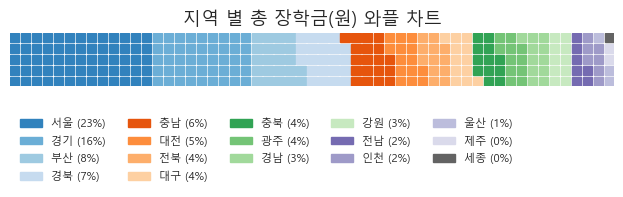

In [1071]:
data = tmp
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=55,
    values=data,
    title={
        'label': '지역 별 총 장학금(원) 와플 차트',
        'loc': 'center',
        'fontdict': {
            'fontsize': 13
        }
    },
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        # 'labels': [f"{k} ({v}%)" for k, v in data.items()],  # lebels could also be under legend instead
        'loc': 'lower left',
#         'bbox_to_anchor': (0, -0.4),
        'bbox_to_anchor': (0, -2.0),
        'ncol': len(data)/3,
        'framealpha': 0,
        'fontsize': 8
    },
    cmap_name="tab20c"
)

#컬러 겹침

- 서울,경기의 교내외 총 장학금이 전국 총장학금에서 40%의 비중을 차지한다.
- 그 외에는 부산, 경북, 충남, 대전순으로 높은 장학금 액수를 보여준다.
- 수도권 및 주요 거점 지역의 대학에 장학금 액수가 편중되어 있는 것으로 미루어보아 수도권 및 주요 거점 지역 대학의 재정상태가 우수할 것으로 사료된다.

###  3. 대학 랭킹

- data load

In [1078]:
df_world_rank = pd.read_csv('./data/qs_korean_uni_rank_2023.csv', index_col=0, encoding='cp949')
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "130%"),
                   ("color", 'black')])]
df_world_rank.style.set_caption("QS 2023 한국 우수 대학 순위").set_table_styles(styles)

,대학교,학교명
순위,,
1,서울대,서울대학교
2,카이스트,한국과학기술원
3,포항공대,포항공과대학교
4,연세대,연세대학교
5,고려대,고려대학교
6,성균관대,성균관대학교
7,한양대,한양대학교
8,울산과기대,울산과학기술원
9,경희대,경희대학교


<hr>

### Ⅳ. 각 지표를 반영한 전국 대학 운영 안전 지수 분석

In [1038]:
# 표13) 대학 운영 안전 지수 및 등급 분석

In [1039]:
#충원율 점수

In [1040]:
enroll_rank = df_area_added[['학교','지역','정원내 신입생 충원율(%) (D/B) × 100']]
enroll_rank

,학교,지역,정원내 신입생 충원율(%) (D/B) × 100
기준연도,,,
2022,가천대학교,경기,100.00
2022,가톨릭대학교,경기,99.80
2022,가톨릭대학교 _제2캠퍼스,서울,100.00
2022,가톨릭대학교 _제3캠퍼스,서울,98.00
2022,감리교신학대학교,서울,44.20
...,...,...,...
2022,호남대학교,광주,95.40
2022,호남신학대학교,광주,100.00
2022,호원대학교,전북,93.70


In [1041]:
enroll_rank.describe()

,정원내 신입생 충원율(%) (D/B) × 100
count,244.00
mean,90.61
std,19.95
min,14.20
25%,91.97
50%,99.70
75%,99.90
max,109.00


In [1042]:
e_rank = enroll_rank.copy()
print(e_rank.loc[e_rank['학교']=='대구경북과학기술원'])
e_rank.loc[(e_rank['정원내 신입생 충원율(%) (D/B) × 100']>100),'정원내 신입생 충원율(%) (D/B) × 100'] = 100
print(e_rank.loc[e_rank['학교']=='대구경북과학기술원'])

e_rank

             학교  지역  정원내 신입생 충원율(%) (D/B) × 100
기준연도                                           
2022  대구경북과학기술원  대구                      100.90
             학교  지역  정원내 신입생 충원율(%) (D/B) × 100
기준연도                                           
2022  대구경북과학기술원  대구                      100.00


,학교,지역,정원내 신입생 충원율(%) (D/B) × 100
기준연도,,,
2022,가천대학교,경기,100.00
2022,가톨릭대학교,경기,99.80
2022,가톨릭대학교 _제2캠퍼스,서울,100.00
2022,가톨릭대학교 _제3캠퍼스,서울,98.00
2022,감리교신학대학교,서울,44.20
...,...,...,...
2022,호남대학교,광주,95.40
2022,호남신학대학교,광주,100.00
2022,호원대학교,전북,93.70


In [1043]:
# 충원율에 따라 0,1,2 점으로 점수 매기기(qcut 상대평가)
e_rank['enroll_point'] = pd.qcut(e_rank['정원내 신입생 충원율(%) (D/B) × 100'].values, 3).codes
e_rank= e_rank.reset_index(drop=True)
print("대학교 충원율 점수")
e_rank

대학교 충원율 점수


,학교,지역,정원내 신입생 충원율(%) (D/B) × 100,enroll_point
0,가천대학교,경기,100.00,2
1,가톨릭대학교,경기,99.80,1
2,가톨릭대학교 _제2캠퍼스,서울,100.00,2
3,가톨릭대학교 _제3캠퍼스,서울,98.00,1
4,감리교신학대학교,서울,44.20,0
...,...,...,...,...
239,호남대학교,광주,95.40,0
240,호남신학대학교,광주,100.00,2
241,호원대학교,전북,93.70,0
242,제주국제대학교,제주,16.20,0


In [1044]:
# 장학금지금액 점수

In [1045]:
scholarship_rank = df_scholarship[['총계(원)']]
s_rank = scholarship_rank.reset_index(drop=False)
# s_rank.rename(columns={'지역별':'지역'}, inplace=True)
s_rank

,학교명,총계(원)
0,ICT폴리텍대학,"451,587,500.00"
1,가야대학교(김해),"7,280,849,875.00"
2,가천대학교,"63,365,748,634.00"
3,가톨릭관동대학교,"22,820,106,955.00"
4,가톨릭꽃동네대학교,"2,074,362,369.00"
...,...,...
386,호산대학교,"7,037,358,805.00"
387,호서대학교,"41,150,940,080.00"
388,호원대학교,"21,975,617,230.00"
389,홍익대학교,"68,736,771,426.00"


In [1046]:
# 총 장학금 지급액에 따라 0,1,2 점으로 점수 매기기(qcut 상대평가)
s_rank['scholarship_point'] = pd.qcut(s_rank['총계(원)'].values, 3).codes
print(s_rank.loc[s_rank['학교명']=='서울대학교'], end='\n')
print(s_rank.loc[s_rank['학교명']=='신안산대학교'], end='\n')
print("장학금 지급액 점수")
s_rank

       학교명             총계(원)  scholarship_point
168  서울대학교 47,869,429,541.00                  2
        학교명             총계(원)  scholarship_point
213  신안산대학교 10,384,805,275.00                  1
장학금 지급액 점수


,학교명,총계(원),scholarship_point
0,ICT폴리텍대학,"451,587,500.00",0
1,가야대학교(김해),"7,280,849,875.00",1
2,가천대학교,"63,365,748,634.00",2
3,가톨릭관동대학교,"22,820,106,955.00",2
4,가톨릭꽃동네대학교,"2,074,362,369.00",0
...,...,...,...
386,호산대학교,"7,037,358,805.00",1
387,호서대학교,"41,150,940,080.00",2
388,호원대학교,"21,975,617,230.00",2
389,홍익대학교,"68,736,771,426.00",2


In [1047]:
# 세계대학랭킹 점수

In [1048]:
# 세계 대학 랭킹에 든 경우 2 (다른 point와 가중치가 1로 맞추기 위해)
w_rank = df_world_rank.copy()
w_rank['world_point']=2
w_rank.head(10)

,대학교,학교명,world_point
순위,,,
1,서울대,서울대학교,2
2,카이스트,한국과학기술원,2
3,포항공대,포항공과대학교,2
4,연세대,연세대학교,2
5,고려대,고려대학교,2
6,성균관대,성균관대학교,2
7,한양대,한양대학교,2
8,울산과기대,울산과학기술원,2
9,경희대,경희대학교,2


In [1049]:
# dataframe 병합

e_s = pd.merge(left = e_rank , right = s_rank, how = "left", left_on='학교', right_on="학교명")
e_s_w =pd.merge(left = e_s , right = w_rank, how = "left", left_on='학교', right_on="학교명")
e_s_w

,학교,지역,정원내 신입생 충원율(%) (D/B) × 100,enroll_point,학교명_x,총계(원),scholarship_point,대학교,학교명_y,world_point
0,가천대학교,경기,100.00,2,가천대학교,"63,365,748,634.00",2.00,NaN,NaN,NaN
1,가톨릭대학교,경기,99.80,1,가톨릭대학교,"25,520,889,730.00",2.00,가톨릭대,가톨릭대학교,2.00
2,가톨릭대학교 _제2캠퍼스,서울,100.00,2,NaN,NaN,NaN,NaN,NaN,NaN
3,가톨릭대학교 _제3캠퍼스,서울,98.00,1,NaN,NaN,NaN,NaN,NaN,NaN
4,감리교신학대학교,서울,44.20,0,감리교신학대학교,"3,218,426,971.00",0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
239,호남대학교,광주,95.40,0,호남대학교,"23,707,168,565.00",2.00,NaN,NaN,NaN
240,호남신학대학교,광주,100.00,2,호남신학대학교,"2,100,576,115.00",0.00,NaN,NaN,NaN
241,호원대학교,전북,93.70,0,호원대학교,"21,975,617,230.00",2.00,NaN,NaN,NaN
242,제주국제대학교,제주,16.20,0,제주국제대학교,"2,328,783,825.00",0.00,NaN,NaN,NaN


In [1050]:
e_s_w.isnull().sum()

학교                              0
지역                              0
정원내 신입생 충원율(%) (D/B) × 100      0
enroll_point                    0
학교명_x                          28
총계(원)                          28
scholarship_point              28
대학교                           203
학교명_y                         203
world_point                   203
dtype: int64

In [1051]:
final_rank = e_s_w[['학교','지역', 'enroll_point','scholarship_point','world_point']].replace(np.nan, 0)
print(final_rank.loc[final_rank['학교']=='대구경북과학기술원'])
print(final_rank.loc[final_rank['학교']=='서울대학교'])
print(final_rank.loc[final_rank['학교']=='가천대학교'])
final_rank

            학교  지역  enroll_point  scholarship_point  world_point
171  대구경북과학기술원  대구             2               0.00         0.00
       학교  지역  enroll_point  scholarship_point  world_point
36  서울대학교  서울             1               2.00         2.00
      학교  지역  enroll_point  scholarship_point  world_point
0  가천대학교  경기             2               2.00         0.00


,학교,지역,enroll_point,scholarship_point,world_point
0,가천대학교,경기,2,2.00,0.00
1,가톨릭대학교,경기,1,2.00,2.00
2,가톨릭대학교 _제2캠퍼스,서울,2,0.00,0.00
3,가톨릭대학교 _제3캠퍼스,서울,1,0.00,0.00
4,감리교신학대학교,서울,0,0.00,0.00
...,...,...,...,...,...
239,호남대학교,광주,0,2.00,0.00
240,호남신학대학교,광주,2,0.00,0.00
241,호원대학교,전북,0,2.00,0.00
242,제주국제대학교,제주,0,0.00,0.00


In [1052]:
final_rank.loc[:,'sum'] = final_rank.loc[:, 'enroll_point':'world_point'].sum(axis=1)
final_rank

,학교,지역,enroll_point,scholarship_point,world_point,sum
0,가천대학교,경기,2,2.00,0.00,4.00
1,가톨릭대학교,경기,1,2.00,2.00,5.00
2,가톨릭대학교 _제2캠퍼스,서울,2,0.00,0.00,2.00
3,가톨릭대학교 _제3캠퍼스,서울,1,0.00,0.00,1.00
4,감리교신학대학교,서울,0,0.00,0.00,0.00
...,...,...,...,...,...,...
239,호남대학교,광주,0,2.00,0.00,2.00
240,호남신학대학교,광주,2,0.00,0.00,2.00
241,호원대학교,전북,0,2.00,0.00,2.00
242,제주국제대학교,제주,0,0.00,0.00,0.00


In [1053]:
f_rank_sorted = final_rank.sort_values(by=["sum"],ascending=[False])
# tmp = final_rank.sort_values(by=["sum"],ascending=[False])[["설립별", "지역별","교외장학금 소계(원)", "교내장학금 소계(원)", "총계(원)"]]
# sch_top = df_s.iloc[:20,:]
# sch_top
f_rank_sorted.reset_index(drop=True)


,학교,지역,enroll_point,scholarship_point,world_point,sum
0,한림대학교,강원,2,2.00,2.00,6.00
1,숙명여자대학교,서울,2,2.00,2.00,6.00
2,한국과학기술원,대전,2,2.00,2.00,6.00
3,국민대학교,서울,2,2.00,2.00,6.00
4,제주대학교,제주,1,2.00,2.00,5.00
...,...,...,...,...,...,...
239,디지털서울문화예술대학교,서울,0,0.00,0.00,0.00
240,예원예술대학교 _제2캠퍼스,경기,0,0.00,0.00,0.00
241,영남신학대학교,경북,0,0.00,0.00,0.00
242,대구예술대학교,경북,0,0.00,0.00,0.00


In [1054]:
area_to_merge = df_area_added[['권역','지역']].drop_duplicates().sort_values(by='권역').reset_index(drop=True)
area_to_merge

,권역,지역
0,강원권,강원
1,경상권,경남
2,경상권,울산
3,경상권,경북
4,경상권,부산
5,경상권,대구
6,수도권,경기
7,수도권,인천
8,수도권,서울
9,전라권,전북


In [1055]:
uni_safety = pd.merge(left = f_rank_sorted , right = area_to_merge, how = "left", on="지역")
# uni_safety.columns
uni_safety= uni_safety[['학교','권역', '지역', 'enroll_point', 'scholarship_point', 'world_point', 'sum']] #reindex
uni_safety

,학교,권역,지역,enroll_point,scholarship_point,world_point,sum
0,한림대학교,강원권,강원,2,2.00,2.00,6.00
1,숙명여자대학교,수도권,서울,2,2.00,2.00,6.00
2,한국과학기술원,충청권,대전,2,2.00,2.00,6.00
3,국민대학교,수도권,서울,2,2.00,2.00,6.00
4,제주대학교,제주권,제주,1,2.00,2.00,5.00
...,...,...,...,...,...,...,...
239,디지털서울문화예술대학교,수도권,서울,0,0.00,0.00,0.00
240,예원예술대학교 _제2캠퍼스,수도권,경기,0,0.00,0.00,0.00
241,영남신학대학교,경상권,경북,0,0.00,0.00,0.00
242,대구예술대학교,경상권,경북,0,0.00,0.00,0.00


- new dataset complete

In [1056]:
# 점수에 따른 등급(grade) 지정 S-A-B-C 순
def set_grade(val):
    if val in [6,5]: return 'S'
    elif val in [5,4]: return 'A'
    elif val in [3,2]: return 'B'
    else: return 'C'

uni_safety_grade = uni_safety.copy()
uni_safety_grade['sum'].to_frame()
uni_safety_grade['grade'] = uni_safety_grade['sum'].apply(set_grade)
uni_safety_grade

,학교,권역,지역,enroll_point,scholarship_point,world_point,sum,grade
0,한림대학교,강원권,강원,2,2.00,2.00,6.00,S
1,숙명여자대학교,수도권,서울,2,2.00,2.00,6.00,S
2,한국과학기술원,충청권,대전,2,2.00,2.00,6.00,S
3,국민대학교,수도권,서울,2,2.00,2.00,6.00,S
4,제주대학교,제주권,제주,1,2.00,2.00,5.00,S
...,...,...,...,...,...,...,...,...
239,디지털서울문화예술대학교,수도권,서울,0,0.00,0.00,0.00,C
240,예원예술대학교 _제2캠퍼스,수도권,경기,0,0.00,0.00,0.00,C
241,영남신학대학교,경상권,경북,0,0.00,0.00,0.00,C
242,대구예술대학교,경상권,경북,0,0.00,0.00,0.00,C


In [1057]:
# (신입생 충원 현황 기준) 전국 대학 운영 안전 지수 파일 csv export
uni_safety_grade.to_csv('data/result/uni_safety_2023.csv',
                 sep=',',
                 na_rep='NaN', 
                 encoding="utf-8-sig",
                 float_format = '%.2f', # 2 decimal places
                 index = False) # write index

### 1. 전국 대학 운영 안전 지수 분석

In [1058]:
# 표14) 안전지수 전국 상위 20개 대학

In [1059]:
top_20 = uni_safety_grade[:20].sort_values(by=["sum"], 
                                  ascending=[False])

top_20 = uni_safety_grade[:20].reset_index(drop=True)
top_20.index = top_20.index +1
top_20

,학교,권역,지역,enroll_point,scholarship_point,world_point,sum,grade
1,한림대학교,강원권,강원,2,2.00,2.00,6.00,S
2,숙명여자대학교,수도권,서울,2,2.00,2.00,6.00,S
3,한국과학기술원,충청권,대전,2,2.00,2.00,6.00,S
4,국민대학교,수도권,서울,2,2.00,2.00,6.00,S
5,제주대학교,제주권,제주,1,2.00,2.00,5.00,S
6,서울과학기술대학교,수도권,서울,1,2.00,2.00,5.00,S
7,강원대학교,강원권,강원,1,2.00,2.00,5.00,S
8,홍익대학교,수도권,서울,1,2.00,2.00,5.00,S
9,한양대학교,수도권,서울,1,2.00,2.00,5.00,S
10,서강대학교,수도권,서울,1,2.00,2.00,5.00,S


In [1060]:
print('안전지수 전국 상위 20개 대학')
print(list(top_20['학교']))

안전지수 전국 상위 20개 대학
['한림대학교', '숙명여자대학교', '한국과학기술원', '국민대학교', '제주대학교', '서울과학기술대학교', '강원대학교', '홍익대학교', '한양대학교', '서강대학교', '한국외국어대학교', '중앙대학교', '동국대학교', '서울대학교', '인하대학교', '이화여자대학교', '연세대학교', '아주대학교', '숭실대학교', '성균관대학교']


In [1061]:
# 표15) 등급별 학교 목록

In [1062]:
def get_uni_with_condition(df, col, val, target):
    condition = df[col] == val
    return list(df.loc[condition][target])
    

- 운영 안정 등급별 전국 대학 목록 (아래)

In [1063]:
for i in ('S','A','B','C'):
    i_result = get_uni_with_condition(uni_safety_grade, 'grade', i, '학교')
    print(i+"등급 대학 목록")
    print(i_result, end="\n\n\n")

S등급 대학 목록
['한림대학교', '숙명여자대학교', '한국과학기술원', '국민대학교', '제주대학교', '서울과학기술대학교', '강원대학교', '홍익대학교', '한양대학교', '서강대학교', '한국외국어대학교', '중앙대학교', '동국대학교', '서울대학교', '인하대학교', '이화여자대학교', '연세대학교', '아주대학교', '숭실대학교', '성균관대학교', '세종대학교', '가톨릭대학교', '충남대학교', '부경대학교', '전북대학교', '전남대학교', '울산대학교', '건국대학교', '울산과학기술원', '부산대학교', '경희대학교', '영남대학교', '고려대학교', '경북대학교', '단국대학교', '충북대학교', '성신여자대학교']


A등급 대학 목록
['한성대학교', '한국공학대학교', '남서울대학교', '영산대학교', '인천대학교', '한남대학교', '경동대학교', '포항공과대학교', '신한대학교', '광주과학기술원', '수원대학교', '가천대학교', '대진대학교', '서울여자대학교', '서울시립대학교', '상명대학교', '서경대학교', '삼육대학교']


B등급 대학 목록
['한양사이버대학교', '서원대학교', '청주대학교', '을지대학교', '우송대학교', '순천향대학교', '선문대학교', '백석대학교', '강릉원주대학교', '목원대학교', '한국교통대학교', '동덕여자대학교', '공주대학교', '명지대학교', '대전대학교', '광운대학교', '한국기술교육대학교', '한밭대학교', '조선대학교', '전주대학교', '광주대학교', '한동대학교', '한국해양대학교', '강남대학교', '창원대학교', '창신대학교', '경기대학교', '동아대학교', '대구한의대학교', '계명대학교', '경성대학교', '경상국립대학교', '호서대학교', '한세대학교', '나사렛대학교', '총신대학교', '서울신학대학교', '서울사이버대학교', '성결대학교', '차의과학대학교', '용인대학교', '동의대학교', '동서대학교', '동명대학교', '대신대학교', '대구대학

In [1079]:
### 2. 권역별 대학 운영 안정 등급

In [1082]:
uni_safety_grade['권역']=='강원권'

0       True
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: 권역, Length: 244, dtype: bool

In [1088]:
area_list = list(uni_safety_grade['권역'].unique())
area_list

['강원권', '수도권', '충청권', '제주권', '경상권', '전라권']

In [1090]:
base_area = uni_safety_grade[uni_safety_grade['권역']=='강원권']
base_area

,학교,권역,지역,enroll_point,scholarship_point,world_point,sum,grade
0,한림대학교,강원권,강원,2,2.00,2.00,6.00,S
6,강원대학교,강원권,강원,1,2.00,2.00,5.00,S
43,경동대학교,강원권,강원,2,2.00,0.00,4.00,A
63,강릉원주대학교,강원권,강원,1,2.00,0.00,3.00,B
155,가톨릭관동대학교,강원권,강원,0,2.00,0.00,2.00,B
156,상지대학교,강원권,강원,0,2.00,0.00,2.00,B
170,연세대학교(미래) _분교,강원권,강원,1,0.00,0.00,1.00,C
172,춘천교육대학교,강원권,강원,1,0.00,0.00,1.00,C
175,한라대학교,강원권,강원,0,1.00,0.00,1.00,C
178,강원대학교 _제2캠퍼스,강원권,강원,1,0.00,0.00,1.00,C


In [1095]:
base_dict = dict(base_area['grade'].value_counts())
# base_dict
base_data = []
base_labels = []
for k, v in base_dict.items():
    base_data.append(v)
    base_labels.append(k)
    
print(base_data, base_labels)

[6, 3, 2, 1] ['C', 'B', 'S', 'A']


In [1096]:
pie_colors = sns.color_palette('pastel')

Text(0.5, 1.0, '강원권 대학운영안정등급 분포')

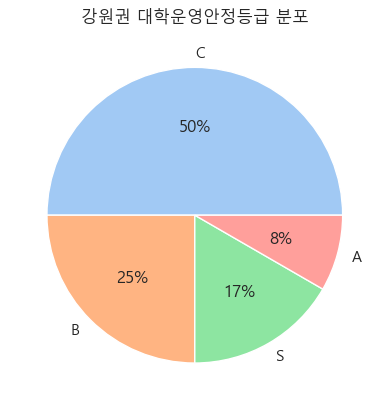

In [1098]:
plt.pie(base_data, labels = base_labels, colors = pie_colors, autopct='%.0f%%')
plt.title(f"강원권 대학운영안정등급 분포")

In [1121]:
def make_piechart(area, df, area_col, val_col):
    base_area = df[df[area_col]==area]
    base_dict = dict(base_area[val_col].value_counts())
    base_data = []
    base_labels = []
    for k, v in base_dict.items():
        base_data.append(v)
        base_labels.append(k)
    pie_colors = sns.color_palette('pastel')
    ax = plt.pie(base_data, labels = base_labels, colors = pie_colors, autopct='%.0f%%')
    return ax
    
    

([<matplotlib.patches.Wedge at 0x21c84af6610>,
 [Text(6.735557395310444e-17, 1.1, 'C'),
  Text(-0.7778174593052025, -0.7778174593052023, 'B'),
  Text(0.5500000148652437, -0.9526279355804299, 'S'),
  Text(1.0625184200244853, -0.2847009081627096, 'A')],
 [Text(3.6739403974420595e-17, 0.6, '50%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25%'),
  Text(0.30000000810831473, -0.5196152375893254, '17%'),
  Text(0.5795555018315374, -0.15529140445238704, '8%')])

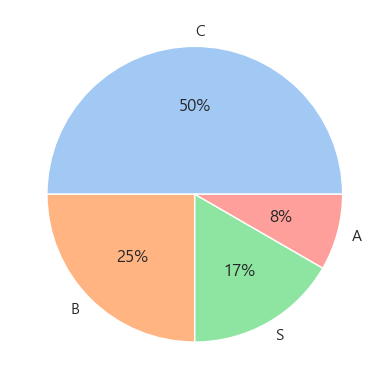

In [1122]:
ret = make_piechart(area='강원권', df=uni_safety_grade, area_col='권역', val_col='grade')
ret

TypeError: pie() got an unexpected keyword argument 'ax'

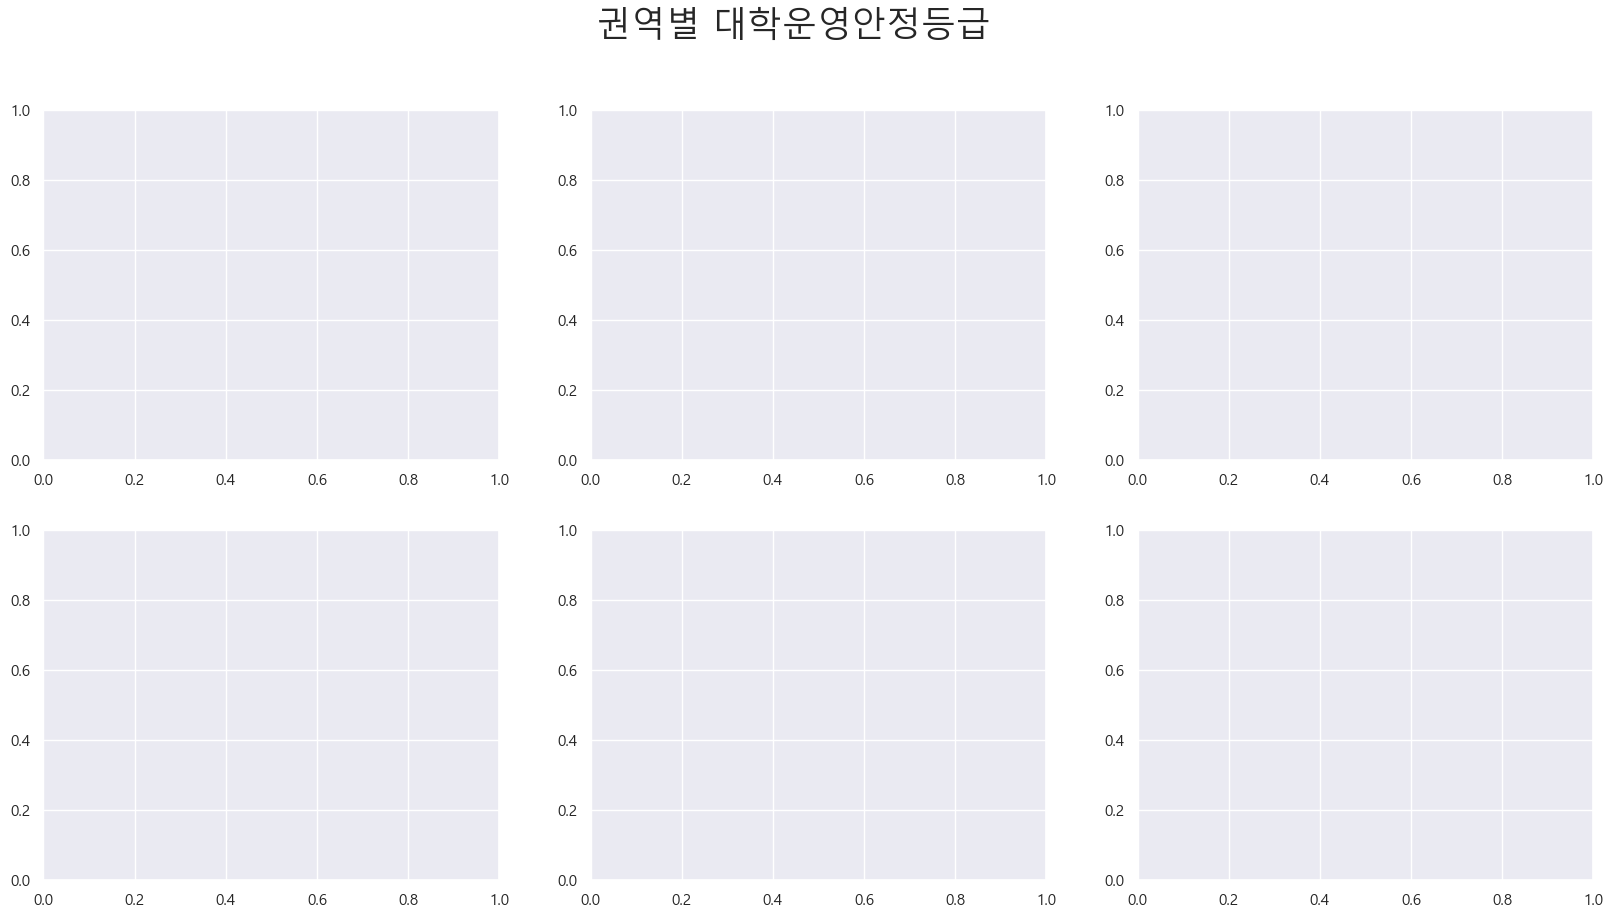

In [1119]:
col_p = 3
row_p = 2
p_fig, p_ax = plt.subplots(ncols=col_p, nrows=row_p, figsize=(20,row_n*5))

p_fig.suptitle('권역별 대학운영안정등급', fontsize=25)


for i, name in enumerate(area_list):
    if i >=3:
        i = i%3
    make_piechart(area=name, df=uni_safety_grade, area_col='권역', val_col='grade',i=i)

In [1115]:
3%3

0

In [ ]:
uni_safety_grade['권역']=='강원권'

Text(0.5, 0.98, '권역별 대학운영안정등급')

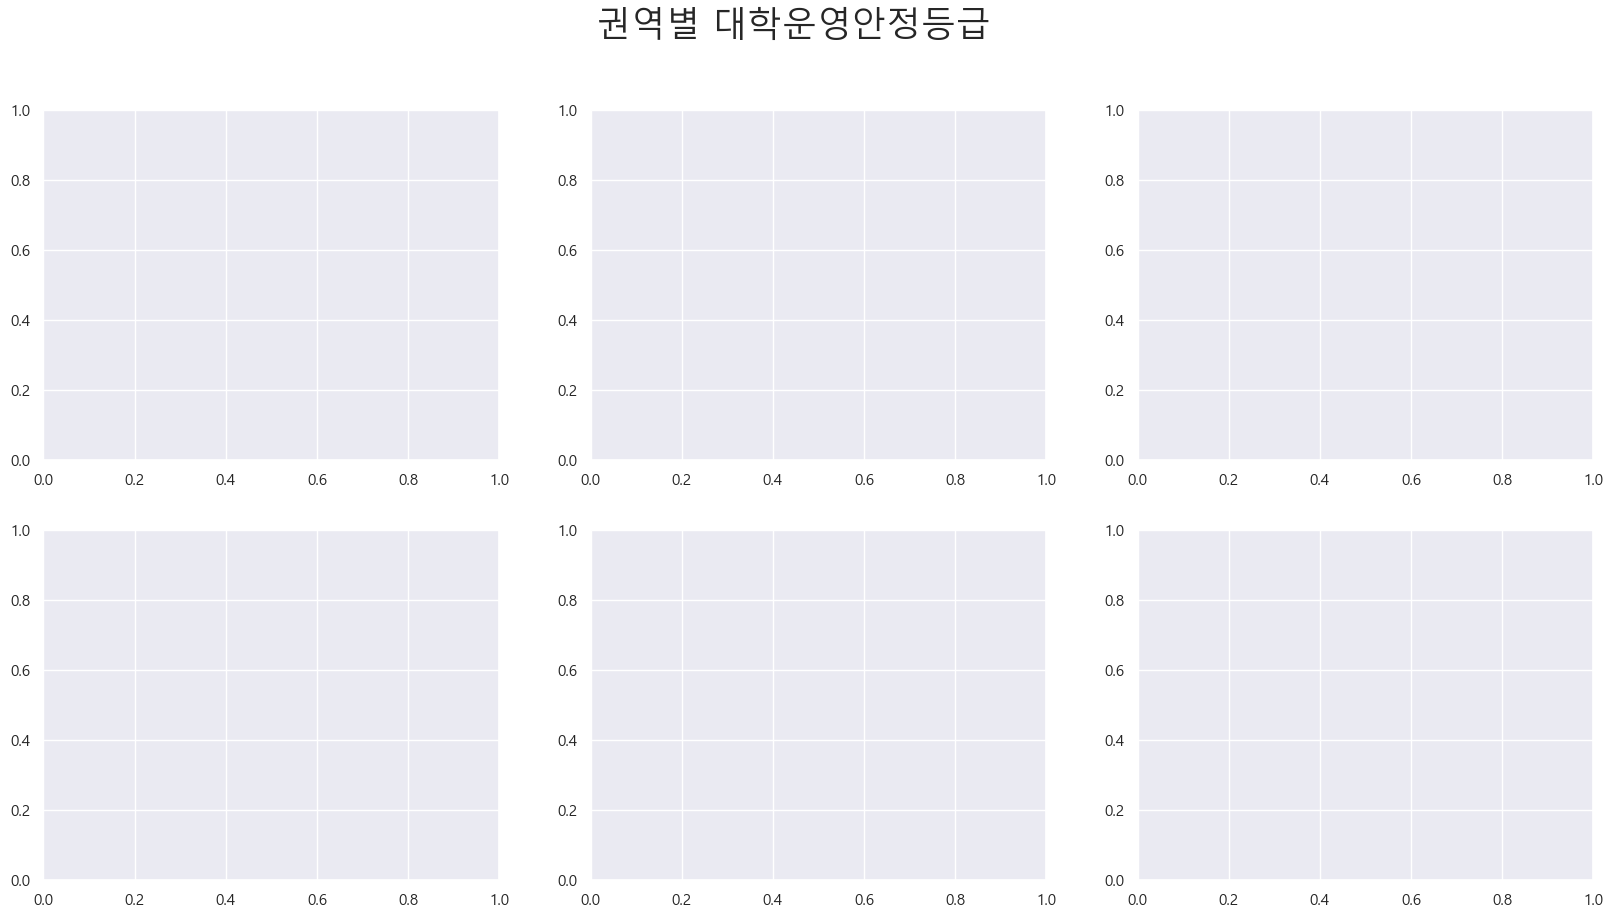

In [1129]:
col_p = 3
row_p = 2
p_fig, p_ax = plt.subplots(ncols=col_p, nrows=row_p, figsize=(20,row_n*5))

p_fig.suptitle('권역별 대학운영안정등급', fontsize=25)
